<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#引入" data-toc-modified-id="引入-1">引入</a></span></li><li><span><a href="#概念" data-toc-modified-id="概念-2">概念</a></span><ul class="toc-item"><li><span><a href="#Figure" data-toc-modified-id="Figure-2.1">Figure</a></span></li><li><span><a href="#Axes" data-toc-modified-id="Axes-2.2">Axes</a></span></li></ul></li><li><span><a href="#一个简单的开始" data-toc-modified-id="一个简单的开始-3">一个简单的开始</a></span><ul class="toc-item"><li><span><a href="#数据准备" data-toc-modified-id="数据准备-3.1">数据准备</a></span></li><li><span><a href="#Radar-Chart" data-toc-modified-id="Radar-Chart-3.2">Radar Chart</a></span></li><li><span><a href="#Line-Chart" data-toc-modified-id="Line-Chart-3.3">Line Chart</a></span></li><li><span><a href="#Multiple-Lines-Chart" data-toc-modified-id="Multiple-Lines-Chart-3.4">Multiple Lines Chart</a></span></li><li><span><a href="#Bar-Chart" data-toc-modified-id="Bar-Chart-3.5">Bar Chart</a></span></li><li><span><a href="#Pie-Chart" data-toc-modified-id="Pie-Chart-3.6">Pie Chart</a></span></li><li><span><a href="#Scatter-Chart" data-toc-modified-id="Scatter-Chart-3.7">Scatter Chart</a></span></li></ul></li></ul></div>

# 引入

# 概念



## Figure

使用figure函数创建实例，调用gcf函数获取当前figure，调用close函数释放Figure实例占用的内存，调用clf函数清理当前figure，调用draw函数重绘。

## Axes
Axes对象用来抽象Figure Element及坐标系控制。  

# 一个简单的开始

下面将以北京，经纬度坐标 (39.9067,116.403)， 2018年07月天气数据作为数据源，逐步定义需求，学习使用matplotlib，最终需求。

In [87]:
# 引入notebook中使用到的库
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import requests as r
from datetime import datetime as dt
from time import sleep
import pandas as pd
from collections import Counter

## 数据准备

[2018年07月北京天气数据](matplot笔记/Beijing_weather_201807.csv)以csv的格式提供。我们通过pandas库将csv文件数据读入内存中使用。  
如下所示： 

In [88]:
data = pd.read_csv('matplot笔记/Beijing_weather_201807.csv')

In [89]:
data[:5]

,temperature,dewpoint,pressure,wind_speed,wind_dir,wind_dir_degrees,visibility,humidity,max_temperature,min_temperature,...,sec,monthname,monthname_short,weekday,weekday_short,ampm,tz_short,tz_long,tz_offset_text,tz_offset_hours
0,83,69,29.67,8,null,null,5,null,88,77,...,0,July,Jul,Sunday,Sun,PM,CST,Asia/Shanghai,800,8
1,81,69,29.64,5,null,null,6,null,88,74,...,0,July,Jul,Monday,Mon,PM,CST,Asia/Shanghai,800,8
2,80,71,29.53,4,null,null,4,null,87,73,...,0,July,Jul,Tuesday,Tue,PM,CST,Asia/Shanghai,800,8
3,86,70,29.45,4,null,null,5,null,96,75,...,0,July,Jul,Wednesday,Wed,PM,CST,Asia/Shanghai,800,8
4,84,70,29.56,5,null,null,5,null,95,73,...,0,July,Jul,Thursday,Thu,PM,CST,Asia/Shanghai,800,8


In [90]:
dt.fromtimestamp(data['epoch'][0])

datetime.datetime(2018, 7, 1, 12, 0)

## Radar Chart

每天的天气观测有多个指标。下面使用2018-07-01日天气数据绘制雷达图。  
本例使用雷达图展示天气指标是不太合适的，因为多个指标最终决定的雷达图面积无法表明有价值的信息。


## Line Chart

每日观测的天气数据是一个连续变化的数据。下面绘制折线图展现2018-07天气随时间的变化。  
涉及知识点：  
- plot function
- Date handling

In [91]:
# prepare data
temperatures = data['temperature']
times = [dt.fromtimestamp(epoch) for epoch in data['epoch']]

`plot`函数基础用法，依次传入x，y轴数据即可。

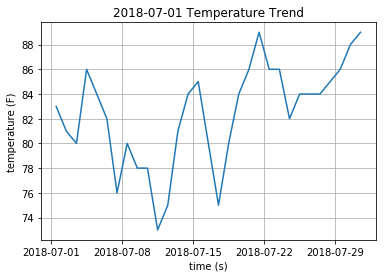

In [92]:
fig, ax = plt.subplots()
ax.plot(times,temperatures)

ax.set(xlabel='time (s)', ylabel='temperature (F)',
       title='2018-07-01 Temperature Trend')
ax.grid()
plt.show()

默认设置情况下，x轴日期数据格式化会重叠，需要特殊处理。  
因为数据是按照日期分布的，所以我们选择天为单位作为major tick，不实用minor tick. Major tick格式化只显示日期。  

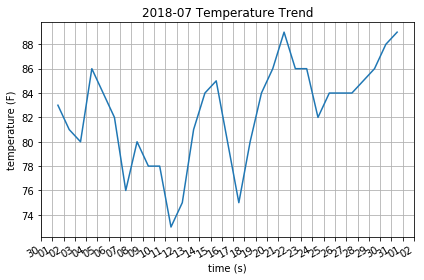

In [93]:
fig, ax = plt.subplots()
ax.plot(times,temperatures)

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.set(xlabel='time (s)', ylabel='temperature (F)',
       title='2018-07 Temperature Trend')
ax.grid()
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Multiple Lines Chart

下面绘制折线图展现2018-07-01日天气随时间的变化。
- 多条数据线
- 图示

In [94]:
# prepare data
temperatures = data['temperature']
min_temperatures = data['min_temperature']
max_temperatures = data['max_temperature']
times = [dt.fromtimestamp(epoch) for epoch in data['epoch']]
dewPoints = data['dewpoint']
windSpeeds = data['wind_speed']
visibilities = data['visibility']

多次调用`plot`函数可以绘制多条曲线。现在我们在同一个图内展示2018-07的温度数据、最高温度、最低温度、露点等数据。当图内有多条曲线时，可以通过设置不同曲线描点的形状进行区分。最好增加图示进行说明，表明每条曲线的含义。图示需要在`plot`函数调用时传入label. 调用`legend`函数时可以设置各种控制要素。  

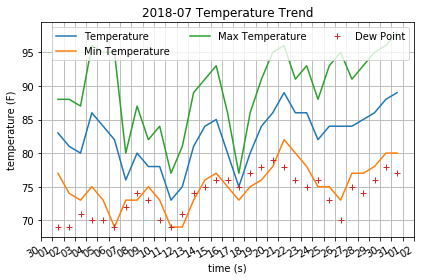

In [95]:
fig, ax = plt.subplots()
ax.plot(times,temperatures, '-', label="Temperature")
ax.plot(times,min_temperatures, '-', label="Min Temperature")
ax.plot(times,max_temperatures, '-', label="Max Temperature")
ax.plot(times,dewPoints, '+', label="Dew Point")

ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.set(xlabel='time (s)', ylabel='temperature (F)',
       title='2018-07 Temperature Trend')
ax.grid()
ax.legend(ncol=3)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

## Bar Chart

下面分别绘制垂直和水平条形图展现2018年07月天气状况的分布情况。

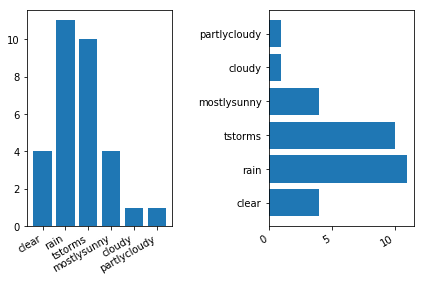

In [96]:
labels_counter = Counter(data['icon'])
labels = data['icon'].unique()
scalars = [labels_counter[lb] for lb in labels]

fig, (ax1,ax2) = plt.subplots(1,2)
ax1.bar(np.arange(len(labels)), scalars, tick_label=labels)
ax2.barh(np.arange(len(labels)), scalars, tick_label=labels)

fig.tight_layout()
fig.autofmt_xdate()
plt.show()

## Pie Chart

下面绘制饼图展现2018年07月天气状况的统计情况。  
天气状况的分类包括：  
- clear
- rain
- tstorms
- mostlysunny
- cloudy
- partlycloudy

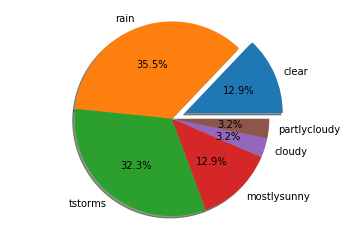

In [97]:
labels_counter = Counter(data['icon'])

labels = data['icon'].unique()
sizes = [labels_counter[label] for label in labels]
explode = [0.15 if label == 'clear' else 0 for label in labels]  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Scatter Chart

以温度作为横坐标，压力作为纵坐标，风速作为点的大小指标绘制散点图，观察2018年7月天气分布情况。

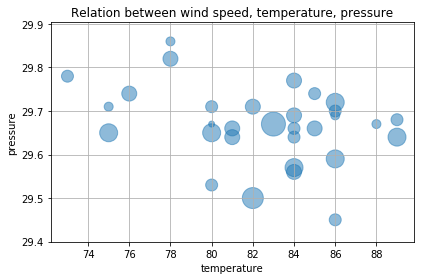

In [98]:
fig, ax = plt.subplots()
ax.scatter(data['temperature'], data['pressure'], s=(3*data['wind_speed']) ** 2, alpha=0.5)

ax.set_xlabel('temperature')
ax.set_ylabel('pressure')
ax.set_title('Relation between wind speed, temperature, pressure')

ax.grid(True)
fig.tight_layout()

plt.show()